In [1]:
#imports
import pandas as pd
import plotly.express as px
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

O termo "churn" se refere à taxa de rotatividade de clientes, ou seja, a taxa na qual os clientes deixam de fazer negócios ou transações com uma empresa ao longo do tempo. No contexto de um banco, o churn pode ser interpretado como a taxa na qual os clientes encerram suas contas, cancelam serviços ou deixam de utilizar produtos financeiros oferecidos pelo banco.

Os modelos de machine learning são frequentemente usados para prever o churn em bancos, pois podem analisar dados históricos dos clientes, identificar padrões e indicadores que precedem o churn e ajudar na previsão de quais clientes têm maior probabilidade de deixar o banco.

In [2]:
df=pd.read_csv ('/kaggle/input/customer-churn-data/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
px.histogram(df, x = 'churn', text_auto = True)

In [5]:
px.histogram(df, x = 'country', text_auto = True, color = 'churn', barmode = 'group')

In [6]:
px.histogram(df, x = 'gender', text_auto = True, color = 'churn', barmode = 'group')

In [7]:
px.histogram(df, x = 'credit_card', text_auto = True, color = 'churn', barmode = 'group')

In [8]:
px.histogram(df, x = 'active_member', text_auto = True, color = 'churn', barmode = 'group')

Esses histogramas são úteis para visualizar a distribuição dos dados em relação às variáveis mencionadas. Eles ajudam a entender como esses dados estão distribuídos e se existem padrões ou tendências visíveis.

Churn: O histograma de churn pode mostrar a distribuição de clientes que permaneceram (não churn) em comparação com aqueles que saíram (churn), permitindo uma visão clara da proporção de churn em relação ao total de clientes.

País, Gênero, Limite de crédito do cartão, Membros ativos: Histogramas para essas variáveis podem mostrar como os clientes estão distribuídos em diferentes categorias ou faixas. 

In [9]:
px.box(df, x = 'credit_score', color = 'churn')

In [10]:
px.box(df, x = 'age', color = 'churn')

In [11]:
px.box(df, x = 'estimated_salary', color = 'churn')

In [12]:
px.box(df, x = 'tenure', color = 'churn')

O uso de boxplots complementa a análise exploratória de dados realizada pelos histogramas. Enquanto os histogramas fornecem uma visão geral da distribuição dos dados, os boxplots oferecem informações adicionais sobre a dispersão, a presença de outliers e a mediana dos dados em relação às diferentes variáveis.

In [13]:
y = df['churn']  # Armazena apenas a coluna 'churn' como variável alvo
x = df.drop('churn', axis=1)  # Remove a coluna 'churn' e mantém o restante como variáveis explicativas

Após essa primeira análise é feita a separação da variável churn para as demais. Em modelos de machine learning, 'y' representa a variável alvo que você está tentando prever. No caso do churn

Esta linha está criando a variável 'x' (features ou características). Isso significa que 'x' contém todas as outras colunas do DataFrame, que são os recursos ou variáveis independentes que serão usados para prever o churn.

In [14]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['gender','country', 'credit_card', 'active_member']
),
    remainder = 'passthrough',
    sparse_threshold=0)


Essa parte do programa está usando o ColumnTransformer do módulo preprocessing do scikit-learn para aplicar transformações específicas nas colunas do conjunto de dados antes de alimentar um modelo de machine learning.

make_column_transformer: Esta função do scikit-learn cria um transformador de colunas. É usado para aplicar transformações específicas em diferentes colunas do conjunto de dados.

OneHotEncoder(drop='if_binary'): Esta parte define o tipo de transformação que será aplicado às colunas selecionadas. No caso, está sendo utilizado o OneHotEncoder, que é usado para converter variáveis categóricas em representações numéricas, especialmente quando se trabalha com algoritmos de machine learning que exigem dados numéricos. O parâmetro drop='if_binary' indica que, se a coluna for binária, deve ser codificada usando apenas um atributo (por exemplo, transformando 'male'/'female' em 0/1).

Genero, pais, cartão de crédito e membro ativo são as colunas que serão transformadas usando o OneHotEncoder. São variáveis categóricas que precisam ser codificadas para serem usadas em modelos de machine learning.

remainder='passthrough': Esta parte indica como lidar com as colunas que não são especificadas na transformação. No caso 'passthrough', elas não serão alteradas e serão passadas diretamente para a saída, preservando suas características originais.

sparse_threshold=0: Especifica o limite para os dados esparsos (sparse data). Quando a matriz transformada for esparsa e o número de elementos não nulos for maior que o valor especificado (neste caso, 0), a saída será densa (não esparsa).

Em resumo, essa parte do programa define um transformador de colunas que aplica a codificação one-hot (OneHotEncoder) em colunas específicas do DataFrame, mantendo as outras colunas inalteradas e garantindo que a saída seja densa para certas condições de esparsidade dos dados transformados. Essa transformação é frequentemente usada para preparar variáveis categóricas para serem usadas em modelos de machine learning.

In [15]:
colunas = x.columns

Os nomes das colunas  do conjunto de dados 'x' está em uma variável chamada 'colunas'.

In [16]:
x = one_hot.fit_transform(x)

one_hot.fit_transform(x): Esta linha de código está utilizando o método fit_transform() do ColumnTransformer (one_hot) para aplicar todas as transformações definidas anteriormente (no ColumnTransformer) aos dados do DataFrame 'x'. Isso inclui a codificação one-hot para as colunas 'gender', 'country', 'credit_card' e 'active_member' (como especificado anteriormente na definição do ColumnTransformer).

Após essa linha de código ser executada, 'x' conterá os dados transformados. Em particular, as colunas que foram especificadas para codificação one-hot terão suas categorias convertidas em representações numéricas, enquanto outras colunas serão preservadas conforme definido na etapa anterior.

In [17]:
one_hot.get_feature_names_out(colunas)

pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__gender_Male,onehotencoder__country_France,onehotencoder__country_Germany,onehotencoder__country_Spain,onehotencoder__credit_card_1,onehotencoder__active_member_1,remainder__customer_id,remainder__credit_score,remainder__age,remainder__tenure,remainder__balance,remainder__products_number,remainder__estimated_salary
0,0.0,1.0,0.0,0.0,1.0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,0.0,0.0,0.0,1.0,0.0,1.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,0.0,1.0,0.0,0.0,1.0,0.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,0.0,1.0,0.0,0.0,0.0,0.0,15701354.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,0.0,0.0,0.0,1.0,1.0,1.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.0,0.0,1.0,0.0,15606229.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,1.0,1.0,0.0,0.0,1.0,1.0,15569892.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,0.0,1.0,0.0,0.0,0.0,1.0,15584532.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,1.0,0.0,1.0,0.0,1.0,0.0,15682355.0,772.0,42.0,3.0,75075.31,2.0,92888.52


one_hot.get_feature_names_out(colunas): Aqui, estamos usando o método get_feature_names_out() do ColumnTransformer para obter os nomes das colunas após a transformação. O parâmetro colunas é passado para manter a ordem e os nomes originais das colunas.

pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas)): Esta linha de código está criando um novo DataFrame do Pandas (pd.DataFrame) usando os dados transformados ('x') e definindo os nomes das colunas conforme obtido pelo get_feature_names_out().

In [18]:
label_encoder = LabelEncoder()

O LabelEncoder é uma ferramenta do scikit-learn usada para codificar rótulos de variáveis categóricas em números inteiros, tornando-as mais adequadas para serem usadas em algoritmos de machine learning que exigem entradas numéricas.

LabelEncoder(): Esta linha está criando um objeto LabelEncoder. Esse objeto será usado para realizar a codificação de rótulos, ou seja, converter categorias textuais em números inteiros. Por exemplo, se você tiver uma coluna com categorias 'A', 'B' e 'C', o LabelEncoder atribuirá a cada uma dessas categorias um valor numérico, como 0, 1 e 2, respectivamente.
Depois de criar um LabelEncoder, temos os métodos fit() e transform() para ajustar a codificação aos dados e, em seguida, transformar suas variáveis categóricas em números inteiros, tornando-as adequadas para alimentar modelos de machine learning.

In [19]:
y = label_encoder.fit_transform(y)

Essa linha de código está usando o LabelEncoder para transformar a variável alvo 'y', ou seja, os rótulos de classe, em números inteiros. Isso é comum quando se está lidando com problemas de classificação em machine learning, onde os algoritmos muitas vezes esperam que os rótulos de classe sejam representados numericamente

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y,  random_state = 5)

Este trecho de código está dividindo os dados em conjuntos de treino e teste para usar em um modelo de machine learning. 

train_test_split(): Este método do scikit-learn é usado para dividir os dados em conjuntos de treino e teste.

x: São as características ou features do conjunto de dados que serão usadas para prever o churn.

y: É a variável alvo que contém os rótulos de classe (por exemplo, churn e não churn).

stratify=y: Esse parâmetro garante que a divisão dos dados seja estratificada com base nos rótulos 'y', ou seja, mantém a proporção de churn e não churn nos conjuntos de treino e teste. Isso é útil para garantir que a distribuição das classes seja mantida nas amostras de treino e teste, especialmente quando se tem classes desbalanceadas.

random_state=5: Este parâmetro define a semente para a geração de números aleatórios. Definir um valor para random_state garante que a divisão dos dados seja sempre a mesma, útil para reproduzir os resultados.

O resultado dessa linha de código são quatro conjuntos de dados:

x_treino: As features de treino, ou seja, o conjunto de dados de características para treinar o modelo.
x_teste: As features de teste, o conjunto de dados de características usado para testar o modelo.
y_treino: Os rótulos de classe correspondentes ao conjunto de treino, usados para treinar o modelo.
y_teste: Os rótulos de classe correspondentes ao conjunto de teste, usados para avaliar o modelo.
Estes conjuntos são usados para treinar o modelo nos dados de treino (x_treino e y_treino) e depois testar a performance do modelo nos dados de teste (x_teste e y_teste).

In [21]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.7964

O DummyClassifier é um classificador básico do scikit-learn que serve como uma linha de base simples para comparar com outros modelos mais complexos. Ele toma decisões com base em estratégias simples, como por exemplo, prever sempre a classe mais frequente nos dados de treino.

Nesse caso, ao usar o DummyClassifier para prever o churn com base nos seus dados de teste (x_teste e y_teste), o resultado de 0.7964 obtido com o método score() indica a acurácia do modelo.

A acurácia é uma métrica simples que mede a proporção de previsões corretas do modelo em relação ao total de previsões. Neste caso, o valor de acurácia de 0.7964 significa que o DummyClassifier acertou aproximadamente 79.64% das previsões nos dados de teste.

In [22]:
arvore = DecisionTreeClassifier(max_depth = 4, random_state =5)
arvore.fit(x_treino, y_treino)

arvore.score(x_teste, y_teste)

0.8464

DecisionTreeClassifier(max_depth=4, random_state=5): Cria um classificador de árvore de decisão. max_depth=4 define a profundidade máxima da árvore para limitar a complexidade do modelo e prevenir overfitting. random_state=5 é utilizado para garantir a reprodutibilidade dos resultados.

arvore.fit(x_treino, y_treino): Ajusta o modelo de árvore de decisão aos dados de treino. Isso significa que o modelo está aprendendo padrões nos dados de treino para fazer previsões sobre o churn.

arvore.score(x_teste, y_teste): Calcula a acurácia do modelo treinado usando os dados de teste. O método score() do DecisionTreeClassifier retorna a acurácia, que é a proporção de previsões corretas feitas pelo modelo nos dados de teste.

O resultado obtido após a execução do score() foi a acurácia do modelo de árvore de decisão nos dados de teste. Essa métrica representa o quão bem o modelo está performando na tarefa de prever o churn com base nos dados de teste. Essa acurácia pode ser usada para comparar com a acurácia obtida anteriormente com o DummyClassifier e entender se o modelo de árvore de decisão está performando melhor que uma abordagem de previsão aleatória ou baseada na classe mais frequente.

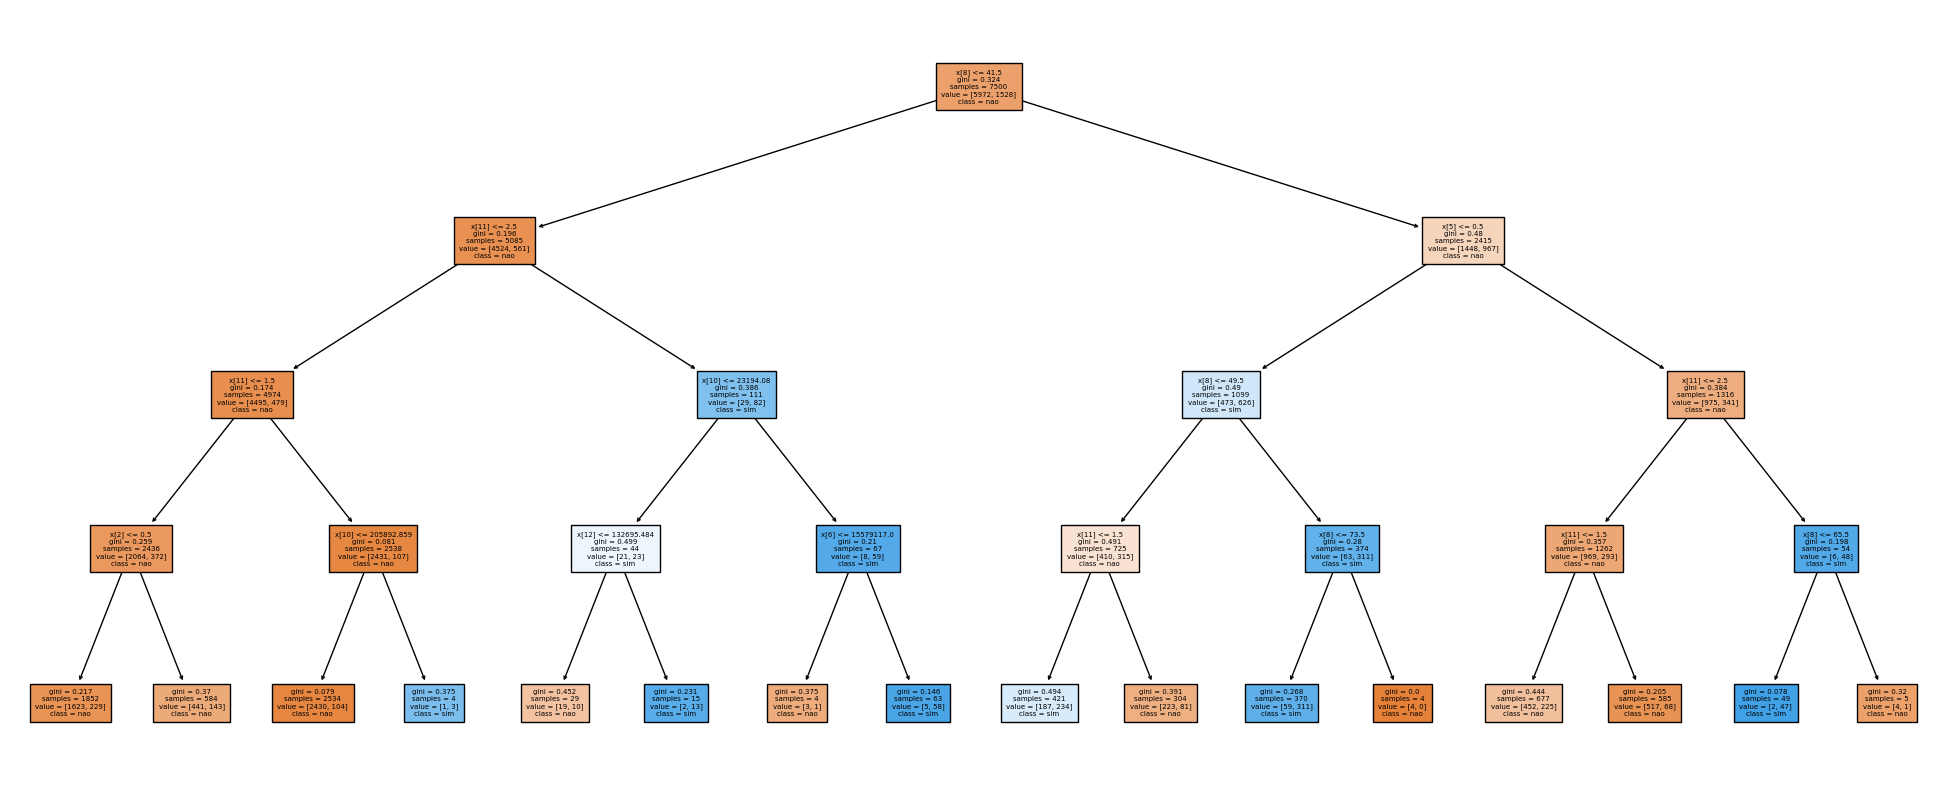

In [23]:
plt.figure(figsize = (25, 10))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 5);